In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/technology_data.csv
/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/sports_data.csv
/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/education_data.csv
/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/entertainment_data.csv
/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv


> I choosing business data csv

In [3]:
# load text
filename = '/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv'
file = open(filename, 'rt')
text = file.read()
file.close()

In [4]:
import string
from nltk.corpus import stopwords

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [7]:
import pandas as pd
from collections import Counter  # Add this line to import Counter

# Function to process CSV docs and add to vocab
def process_csv(filename, vocab):
    # Read the CSV file
    df = pd.read_csv(filename)
    # Iterate through each row
    for index, row in df.iterrows():
        # Assuming your text column is named 'text', change it accordingly if not
        text = row['content']
        # Add doc to vocab
        add_doc_to_vocab(text, vocab)

# Function to add document to vocab
def add_doc_to_vocab(doc, vocab):
    # Your existing code to clean and tokenize the document
    # Assuming you have a clean_doc function defined
    
    # Tokenize the document
    tokens = clean_doc(doc)
    # Update vocab counts
    vocab.update(tokens)

# Define vocab
vocab = Counter()

# Add all docs from CSV to vocab
process_csv('/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv', vocab)

# Print the size of the vocab
print(len(vocab))
# Print the top words in the vocab
print(vocab.most_common(50))


21486
[('per', 5790), ('cent', 5027), ('said', 4737), ('The', 4473), ('Rs', 3373), ('ADVERTISEMENT', 2671), ('India', 2268), ('crore', 2232), ('year', 1406), ('also', 1296), ('growth', 1181), ('market', 1109), ('Bank', 1100), ('In', 962), ('company', 935), ('points', 883), ('billion', 859), ('last', 855), ('oil', 838), ('US', 837), ('Indian', 832), ('Already', 782), ('Sign', 782), ('data', 781), ('Nifty', 775), ('government', 767), ('This', 751), ('global', 749), ('prices', 742), ('Now', 708), ('quarter', 707), ('subscriber', 705), ('rate', 672), ('USD', 664), ('financial', 655), ('markets', 650), ('inflation', 647), ('lakh', 629), ('account', 617), ('story', 604), ('would', 579), ('high', 575), ('new', 565), ('price', 559), ('domestic', 546), ('higher', 545), ('first', 544), ('interest', 544), ('Ltd', 525), ('companies', 520)]


> Bag-of-Words Representation - if only have csv files

In [15]:
import pandas as pd
import string
from nltk.corpus import stopwords

# Function to clean and tokenize text
def clean_doc(doc):
    # Split into tokens by white space
    tokens = doc.split()
    # Remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # Remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # Filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# Function to process CSV docs and filter based on vocab
def process_csv(filename):
    # Read the CSV file
    df = pd.read_csv(filename)
    # Initialize lists for positive and negative lines
    positive_lines = []
    negative_lines = []
    # Iterate through each row
    for index, row in df.iterrows():
        # Assuming your text column is named 'content', change it accordingly if not
        text = row['content']
        # Clean and tokenize the text
        tokens = clean_doc(text)
        # Assuming your classification column is named 'label', change it accordingly if not
        if row['content'] == 'positive':
            positive_lines.append(text)
        else:
            negative_lines.append(text)
    return positive_lines, negative_lines

# Process the CSV file and filter based on vocabulary
positive_lines, negative_lines = process_csv('/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv')

# Summarize the results
print("Number of content positive lines:", len(positive_lines))
print("Number of content negative lines:", len(negative_lines))

Number of content positive lines: 0
Number of content negative lines: 2000


In [14]:
import pandas as pd
import string
from nltk.corpus import stopwords

# Function to clean and tokenize text
def clean_doc(doc):
    # Split into tokens by white space
    tokens = doc.split()
    # Remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # Remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # Filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# Function to process CSV docs and filter based on vocab
def process_csv(filename):
    # Read the CSV file
    df = pd.read_csv(filename)
    # Initialize lists for positive and negative lines
    positive_lines = []
    negative_lines = []
    # Iterate through each row
    for index, row in df.iterrows():
        # Assuming your text column is named 'content', change it accordingly if not
        text = row['headlines']
        # Clean and tokenize the text
        tokens = clean_doc(text)
        # Assuming your classification column is named 'label', change it accordingly if not
        if row['headlines'] == 'positive':
            positive_lines.append(text)
        else:
            negative_lines.append(text)
    return positive_lines, negative_lines

# Process the CSV file and filter based on vocabulary
positive_lines, negative_lines = process_csv('/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv')

# Summarize the results
print("Number of headlines positive lines:", len(positive_lines))
print("Number of headlines negative lines:", len(negative_lines))

Number of headlines positive lines: 0
Number of headlines negative lines: 2000


In [17]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import string
from nltk.corpus import stopwords

# Function to clean and tokenize text
def clean_doc(doc):
    # Split into tokens by white space
    tokens = doc.split()
    # Remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # Remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # Filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    # Join the tokens back into a single string
    return ' '.join(tokens)

# Function to process CSV docs and filter based on vocab
def process_csv(filename):
    # Read the CSV file
    df = pd.read_csv(filename)
    # Initialize a list for lines
    lines = []
    # Iterate through each row
    for index, row in df.iterrows():
        # Assuming your text column is named 'content', change it accordingly if not
        text = row['content']
        # Clean and tokenize the text
        clean_text = clean_doc(text)
        # Append the cleaned text to the list
        lines.append(clean_text)
    return lines

# Load and process CSV file for training data
positive_lines = process_csv('/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv')

# Create the tokenizer
tokenizer = Tokenizer()
# Fit the tokenizer on the documents
tokenizer.fit_on_texts(positive_lines)

# Encode training data set
Xtrain = tokenizer.texts_to_matrix(positive_lines, mode='freq')
print(Xtrain.shape)

# Load and process CSV file for test data
test_positive_lines = process_csv('/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv')

# Encode test data set
Xtest = tokenizer.texts_to_matrix(test_positive_lines, mode='freq')
print(Xtest.shape)

(2000, 18755)
(2000, 18755)


> Sentiment Analysis Model

In [19]:
from numpy import array
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords

In [20]:
# Function to clean and tokenize text
def clean_doc(doc):
    # Split into tokens by white space
    tokens = doc.split()
    # Remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # Remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # Filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    # Join the tokens back into a single string
    return ' '.join(tokens)

# Function to process CSV docs and filter based on vocab
def process_csv(filename):
    # Read the CSV file
    df = pd.read_csv(filename)
    # Initialize a list for lines
    lines = []
    # Iterate through each row
    for index, row in df.iterrows():
        # Assuming your text column is named 'content', change it accordingly if not
        text = row['content']
        # Clean and tokenize the text
        clean_text = clean_doc(text)
        # Append the cleaned text to the list
        lines.append(clean_text)
    return lines

# Load and process CSV file for training data
positive_lines = process_csv('/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv')

# Create the tokenizer
tokenizer = Tokenizer()
# Fit the tokenizer on the documents
tokenizer.fit_on_texts(positive_lines)

# Encode training data set
Xtrain = tokenizer.texts_to_matrix(positive_lines, mode='freq')
ytrain = np.zeros(len(positive_lines))  # Assuming all samples are of the same class (e.g., positive)
n_words = Xtrain.shape[1]  # Number of words in vocabulary

# Define network
model = Sequential()
model.add(Dense(50, input_shape=(n_words,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit network
model.fit(Xtrain, ytrain, epochs=50, verbose=2)

# Evaluate
Xtest = tokenizer.texts_to_matrix(positive_lines, mode='freq')  # Assuming test data is the same as training data
ytest = np.zeros(len(positive_lines))  # Assuming all test samples are of the same class (e.g., positive)
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc * 100))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
63/63 - 1s - 22ms/step - accuracy: 0.9970 - loss: 0.5543
Epoch 2/50
63/63 - 1s - 9ms/step - accuracy: 1.0000 - loss: 0.2626
Epoch 3/50
63/63 - 1s - 10ms/step - accuracy: 1.0000 - loss: 0.1021
Epoch 4/50
63/63 - 0s - 8ms/step - accuracy: 1.0000 - loss: 0.0468
Epoch 5/50
63/63 - 1s - 10ms/step - accuracy: 1.0000 - loss: 0.0261
Epoch 6/50
63/63 - 1s - 10ms/step - accuracy: 1.0000 - loss: 0.0166
Epoch 7/50
63/63 - 0s - 8ms/step - accuracy: 1.0000 - loss: 0.0115
Epoch 8/50
63/63 - 1s - 10ms/step - accuracy: 1.0000 - loss: 0.0085
Epoch 9/50
63/63 - 1s - 10ms/step - accuracy: 1.0000 - loss: 0.0065
Epoch 10/50
63/63 - 1s - 10ms/step - accuracy: 1.0000 - loss: 0.0051
Epoch 11/50
63/63 - 1s - 8ms/step - accuracy: 1.0000 - loss: 0.0042
Epoch 12/50
63/63 - 1s - 10ms/step - accuracy: 1.0000 - loss: 0.0034
Epoch 13/50
63/63 - 0s - 8ms/step - accuracy: 1.0000 - loss: 0.0029
Epoch 14/50
63/63 - 1s - 10ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 15/50
63/63 - 0s - 8ms/step - accuracy: 1.

> Comparing Word Scoring Methods

       binary  count  tfidf   freq
count    1.00  1.000   1.00  1.000
mean     0.54  0.525   0.52  0.525
std       NaN    NaN    NaN    NaN
min      0.54  0.525   0.52  0.525
25%      0.54  0.525   0.52  0.525
50%      0.54  0.525   0.52  0.525
75%      0.54  0.525   0.52  0.525
max      0.54  0.525   0.52  0.525


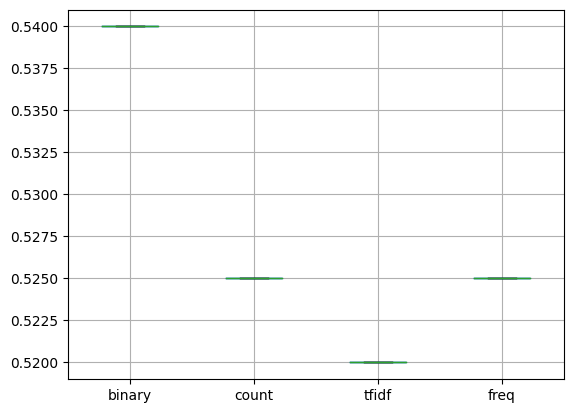

In [22]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Function to clean and tokenize text
def clean_doc(doc):
    # Split into tokens by white space
    tokens = doc.split()
    # Remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # Remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # Filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    # Join the tokens back into a single string
    return ' '.join(tokens)

# Function to load CSV file and preprocess the data
def load_and_preprocess_data(filename):
    # Read the CSV file
    df = pd.read_csv(filename)
    # Clean and preprocess the text data
    df['content'] = df['content'].apply(clean_doc)
    # Split the data into training and test sets
    train_docs, test_docs, ytrain, ytest = train_test_split(df['content'], df['category'], test_size=0.1, random_state=42)
    return train_docs, test_docs, ytrain, ytest

# Function to prepare data for different modes
def prepare_data(train_docs, test_docs, mode):
    if mode == 'binary':
        vectorizer = CountVectorizer(binary=True)
    elif mode == 'count':
        vectorizer = CountVectorizer()
    elif mode == 'tfidf':
        vectorizer = TfidfVectorizer()
    elif mode == 'freq':
        vectorizer = CountVectorizer()
    else:
        raise ValueError("Invalid mode! Choose from 'binary', 'count', 'tfidf', 'freq'.")

    # Fit vectorizer on training data and transform both training and test data
    Xtrain = vectorizer.fit_transform(train_docs)
    Xtest = vectorizer.transform(test_docs)

    return Xtrain, Xtest

# Function to evaluate the model on the data for a given mode
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    # Define and train the classifier (Naive Bayes in this case)
    classifier = MultinomialNB()
    classifier.fit(Xtrain, ytrain)
    # Predict on the test data
    y_pred = classifier.predict(Xtest)
    # Calculate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    return accuracy

# Load and preprocess the data
train_docs, test_docs, ytrain, ytest = load_and_preprocess_data('/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv')

# Prepare labels
ytrain = np.array([0] * (len(train_docs) // 2) + [1] * (len(train_docs) // 2))
ytest = np.array([0] * (len(test_docs) // 2) + [1] * (len(test_docs) // 2))

# Modes for vectorization
modes = ['binary', 'count', 'tfidf', 'freq']
results = pd.DataFrame()

for mode in modes:
    # Prepare data for the current mode
    Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
    # Evaluate the model on the data for the current mode
    results[mode] = [evaluate_mode(Xtrain, ytrain, Xtest, ytest)]

# Summarize results
print(results.describe())

# Plot results
results.boxplot()
plt.show()